In [7]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
# 使用 scikit-learn 自带的一个糖尿病病人的数据集
diabetes = datasets.load_diabetes()  
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)  

regr = linear_model.Lasso()
regr.fit(X_train, y_train)
print('权重系数:', regr.coef_)
print('常数项:', regr.intercept_) # intercept 翻译为 截距
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print("\nMSE:", mse)
print('R^2:', regr.score(X_test, y_test))

权重系数: [  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ]
常数项: 152.52260710501807

MSE: 3583.4215227615487
R^2: 0.27817828862078764


E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


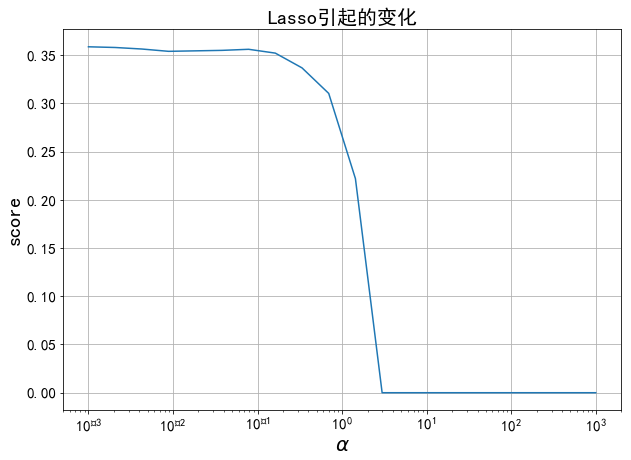

In [9]:
def test_Lasso_alpha(*data):
    '''
    性能随 alpha 参数的影响
    '''
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-3, 3, 20)
    scores = []
    for i, alpha in enumerate(alphas):
        regr = linear_model.Lasso(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.tick_params(labelsize=15)
    ax.set_xlabel(r"$\alpha$", fontsize=20)
    ax.set_ylabel(r"score", fontsize=20)
    ax.set_xscale('log')
    ax.set_title("Lasso引起的变化", fontsize=20)
    plt.grid()
    plt.show()
    
test_Lasso_alpha(X_train,X_test,y_train,y_test)